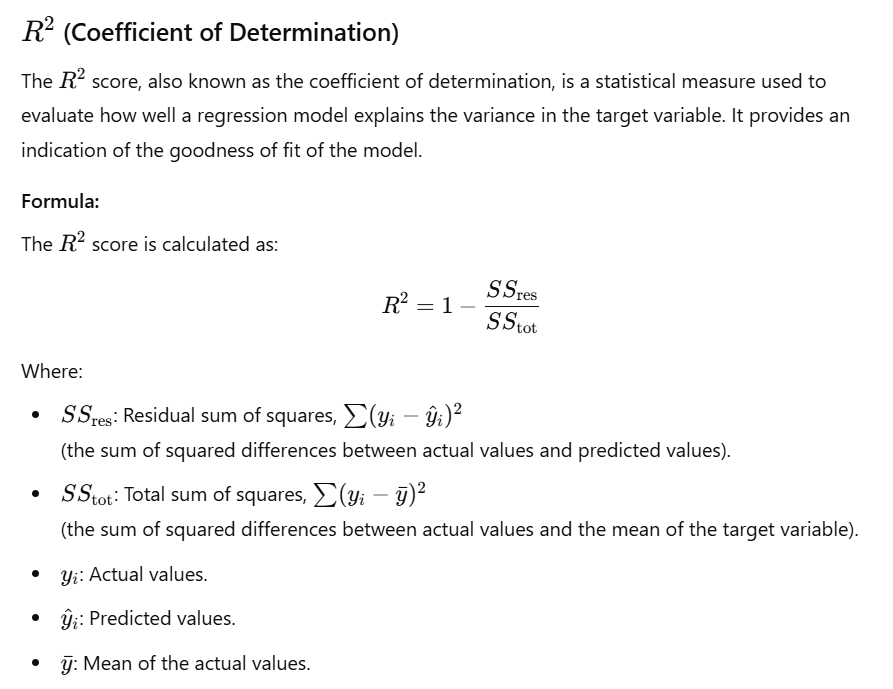

In [30]:
import mglearn
from IPython.display import Image, display

# Load and display the image
image_path = "images/1.png"  # Replace with the actual path
display(Image(filename=image_path))

# Comparison: Linear Models for Classification vs. Linear Models for Regression

Linear models are foundational in machine learning and serve distinct purposes in **classification** and **regression** tasks. Here’s a detailed comparison:

| **Aspect**                     | **Linear Models for Classification**                                    | **Linear Models for Regression**                                    |
|---------------------------------|------------------------------------------------------------------------|--------------------------------------------------------------------|
| **Objective**                  | Classify data into discrete categories.                                | Predict continuous numerical values.                              |
| **Output**                     | Predicted class labels or probabilities.                               | Continuous values.                                                |
| **Decision Boundary**          | Linear decision boundary (hyperplane).                                | Linear relationship between input and output (line or hyperplane).|
| **Loss Function**              | - Logistic Regression: Log Loss (Cross-Entropy Loss).<br>- SVM: Hinge Loss. | - Mean Squared Error (MSE).<br>- Mean Absolute Error (MAE).      |
| **Optimization**               | Minimize classification errors or hinge/log loss.                     | Minimize the difference between predicted and actual values.      |
| **Regularization**             | \( L1 \), \( L2 \), or elastic net for avoiding overfitting.            | \( L1 \), \( L2 \), or elastic net to handle multicollinearity and overfitting. |
| **Interpretation**             | Coefficients represent feature importance for separating classes.      | Coefficients represent how much the target value changes with each feature. |
| **Examples of Algorithms**     | - Logistic Regression<br>- Linear Support Vector Classifier (SVM).    | - Linear Regression<br>- Ridge, Lasso, and Elastic Net Regression. |
| **Evaluation Metrics**         | - Accuracy, Precision, Recall, F1-score, ROC-AUC.                     | - RMSE, MAE, \( R^2 \)-score.                                     |
| **Visualization (2D)**         | Decision boundary separating classes (e.g., line, hyperplane).         | Regression line fitting the data points.                         |
| **Applications**               | - Spam detection.<br>- Disease diagnosis.<br>- Sentiment analysis.    | - Predicting house prices.<br>- Sales forecasting.<br>- Weather prediction. |
| **Assumptions**                | Assumes linearly separable classes (not always true).                  | Assumes a linear relationship between input features and the target. |
| **Flexibility with Nonlinearity** | Can use kernels (e.g., in SVM) or extensions (e.g., neural networks). | Can be extended to polynomial or non-linear regression.          |

## Key Differences:
1. **Nature of Output**:
   - Classification outputs discrete classes (e.g., Yes/No, 0/1).
   - Regression outputs continuous values (e.g., 10.5, 200.0).

2. **Boundary vs. Prediction**:
   - Classification focuses on separating classes with a decision boundary.
   - Regression focuses on predicting numeric values using a linear trend.

3. **Loss Functions**:
   - Loss functions in classification evaluate how well the model separates classes (e.g., log loss, hinge loss).
   - Loss functions in regression evaluate how closely the predicted values match actual values (e.g., MSE, MAE).

4. **Evaluation**:
   - Classification uses metrics like accuracy and F1-score that focus on the correctness of labels.
   - Regression uses metrics like RMSE and \(R^2\), emphasizing the accuracy of predictions.

## Conclusion:
Both linear models for classification and regression share the foundational idea of linear relationships, but their goals, loss functions, and evaluations are distinct. Understanding their differences ensures proper application based on the task at hand. For non-linear relationships, both can be extended with more complex models or feature engineering.


w[0]: 0.393906  b: -0.031804


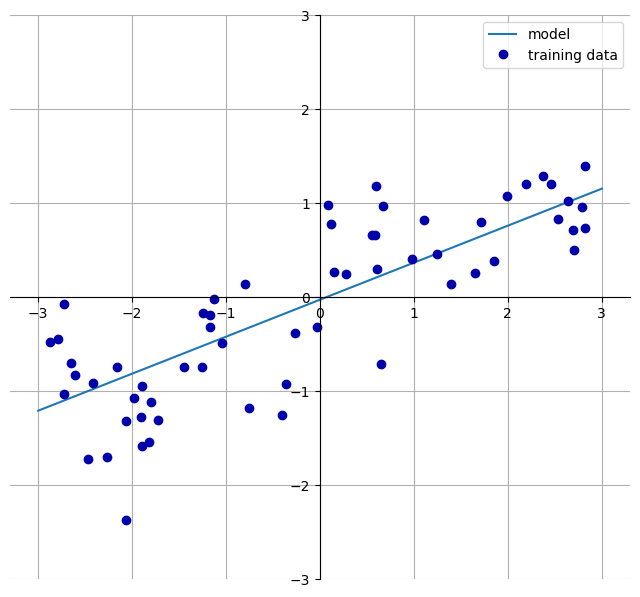

In [2]:
mglearn.plots.plot_linear_regression_wave()

There are many different linear models for regression. The difference between these models lies in how the model parameters w and b are learned from the training data, and how model complexity can be controlled. We will now take a look at the most popular linear models for regression.

In [3]:
#OLS - Linear regression -> find w and b that minimize the mean squared error 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [4]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


Ridge Regression -> train well on training and test (by looking additional constraint -> small number closer to 0 -> have small slope) -> alpha to change ratio between two 

In [5]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [6]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


In [7]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.5).fit(X_train, y_train) # how to select alpha ???
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
#A less complex model means worse performance on the training set, but better generalization

Training set score: 0.90
Test set score: 0.77


In [8]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

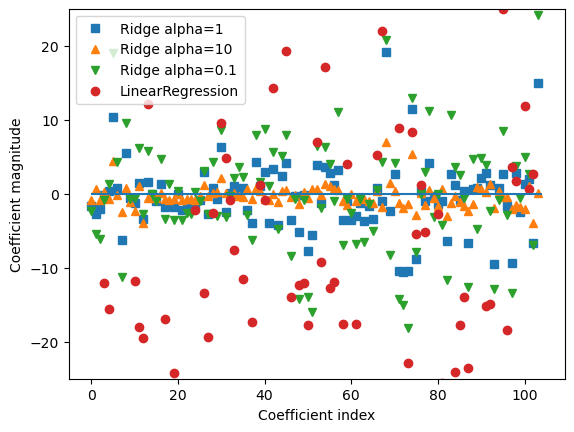

In [9]:
from matplotlib import pyplot as plt
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

The main takeaway here is that for alpha=10, the coefficients are mostly between around –3 and 3, alpha=0.1 have larger magnitude

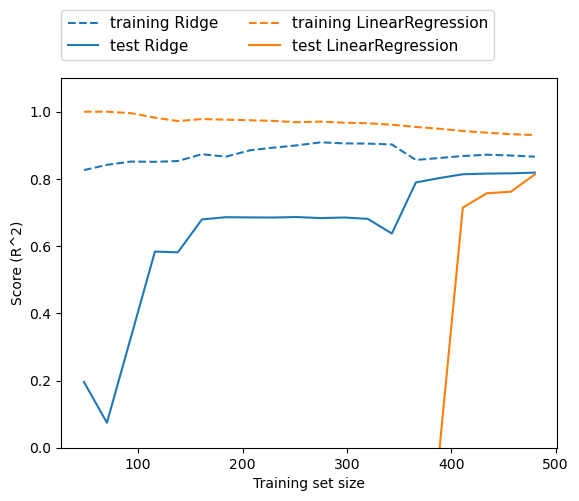

In [10]:
mglearn.plots.plot_ridge_n_samples()

The lesson here is that with enough training data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance

## Lasso
- The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero -> features are entirely ignored by the mode
- alpha -> control how strongly coefficients are pushed toward zero

In [11]:
import numpy as np
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [12]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [13]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

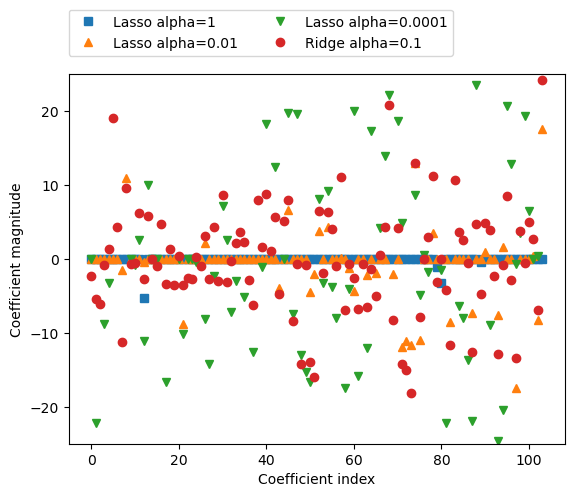

In [14]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In practice, ridge regression is usually the first choice between these two models.

For linear models for regression, the output, ŷ, is a linear function of the features: a line, plane, or hyperplane (in higher dimensions). For linear models for classification, the decision boundary is a linear function of the input. In other words, a (binary) linear classifier is a classifier that separates two classes using a line, a plane, or a hyperplane.

# Linear models for classification

There are many algorithms for learning linear models. These algorithms all differ in the following two ways:

- The way in which they measure how well a particular combination of coefficients and intercept fits the training data
- If and what kind of regularization they use

Different algorithms choose different ways to measure what “fitting the training set well” means. For technical mathematical reasons, it is not possible to adjust w and b to minimize the number of misclassifications the algorithms produce, as one might hope. For our purposes, and many applications, the different choices for item 1 in the preceding list (called loss functions) are of little significance.

The two most common linear classification algorithms are logistic regression, implemented in linear_model.LogisticRegression, and linear support vector machines (linear SVMs), implemented in svm.LinearSVC (SVC stands for support vector classifier).

## Logistic regression

C:\Users\ronal\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\ronal\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


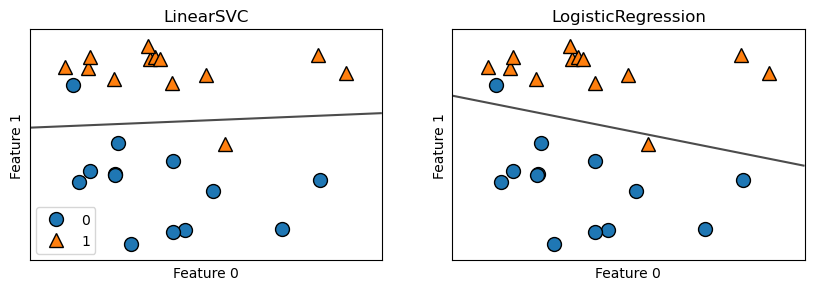

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

For LogisticRegression and LinearSVC the trade-off parameter that determines the strength of the regularization is called C, and higher values of C correspond to less regularization. In other words, when you use a high value for the parameter C, LogisticRegression and LinearSVC try to fit the training set as best as possible, while with low values of the parameter C, the models put more emphasis on finding a coefficient vector (w) that is close to zero

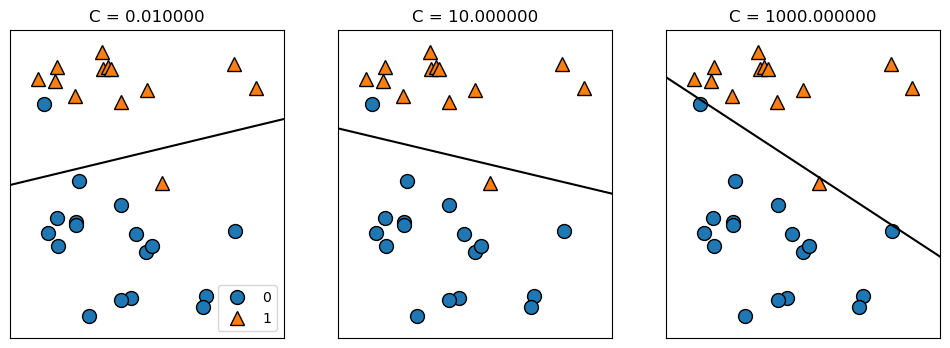

In [16]:
mglearn.plots.plot_linear_svc_regularization()

In [17]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


In [18]:
logreg100 = LogisticRegression(max_iter=100000, C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.981
Test set score: 0.965


In [19]:
logreg001 = LogisticRegression(max_iter=100000, C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))
#As LogisticRegression applies an L2 regularization by default, the result looks similar to that produced by Ridge

Training set score: 0.953
Test set score: 0.951


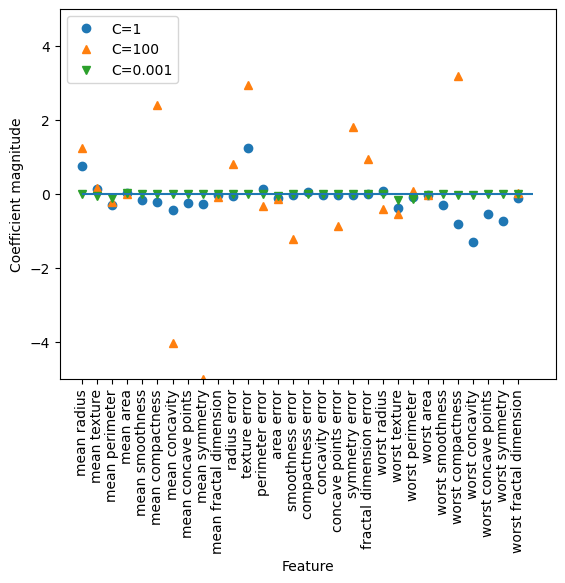

In [20]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

One-Rest approach -> Multi class -> binary for each class {'A', 'B', 'C'} -> consider 'A' and the rest, B and the rest and C like that

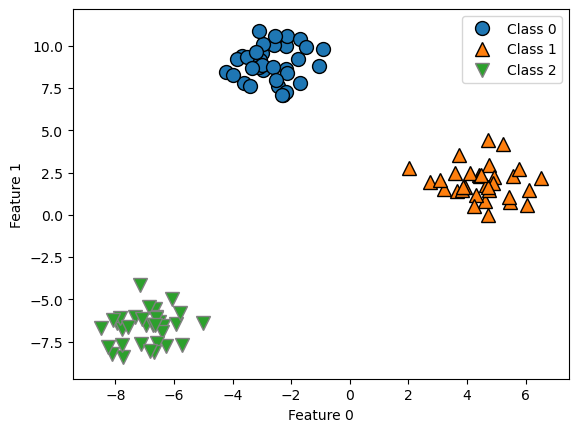

In [21]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [22]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


C:\Users\ronal\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


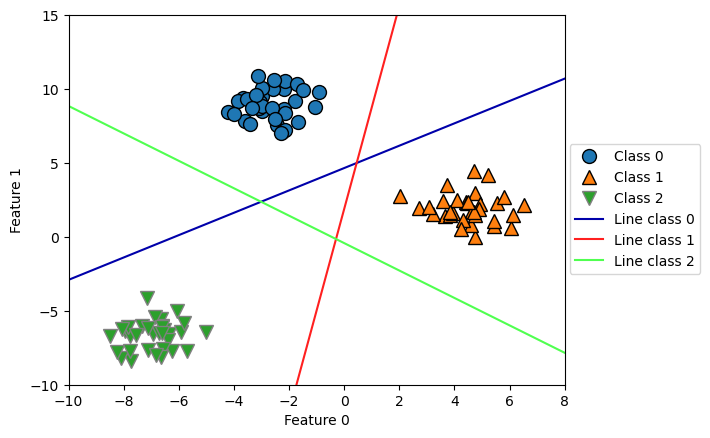

In [23]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

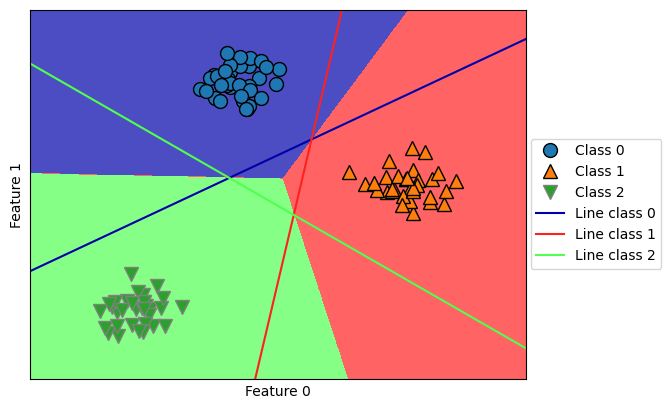

In [24]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

But what about the triangle in the middle of the plot? All three binary classifiers classify points there as “rest.” Which class would a point there be assigned to? The answer is the one with the highest value for the classification formula: the class of the closest line.

The main parameter of linear models is the regularization parameter, called alpha in the regression models and C in LinearSVC and LogisticRegression. Large values for alpha or small values for C mean simple models. In particular for the regression models, tuning these parameters is quite important. Usually C and alpha are searched for on a logarithmic scale. The other decision you have to make is whether you want to use L1 regularization or L2 regularization. If you assume that only a few of your features are actually important, you should use L1. Otherwise, you should default to L2. L1 can also be useful if interpretability of the model is important. As L1 will use only a few features, it is easier to explain which features are important to the model, and what the effects of these features are.

Linear models often perform well when the number of features is large compared to the number of samples. They are also often used on very large datasets, simply because it’s not feasible to train other models. However, in lower-dimensional spaces, other models might yield better generalization performance. 